Comparing CMIP5 and CMIP6 for both the past and the future jet latitudes

In [1]:
import importlib
import xarray as xr
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

from ecpaper_utils import jlat_utils as jlat
from ecpaper_utils import bootstrap_utils as boot
from ecpaper_utils import linfit_utils as linfit

importlib.reload(jlat)
importlib.reload(boot)

import warnings
warnings.filterwarnings('ignore')

In [2]:
datadir="/project/cas/islas/python_savs/ecpaper2020/DATASORT/SHJET/"
cmip5models = ['ACCESS1-3', 'bcc-csm1-1-m','CanESM2','CESM1-CAM5','CESM1-WACCM','CMCC-CMS','CNRM-CM5','EC-EARTH','FGOALS-g2','FIO-ESM','GFDL-CM3','GFDL-ESM2M','GISS-E2-R',
              'HadGEM2-ES','inmcm4','IPSL-CM5A-LR','MIROC5','MIROC-ESM','MPI-ESM-LR','MPI-ESM-MR','MRI-CGCM3','NorESM1-ME']
cmip6models = ['ACCESS-CM2', 'BCC-CSM2-MR','CanESM5','CESM2','CESM2-WACCM','CMCC-CM2-SR5','CNRM-CM6-1','EC-Earth3','FGOALS-g3','FIO-ESM-2-0','GFDL-CM4','GFDL-ESM4','GISS-E2-1-G',
              'HadGEM3-GC31-LL','INM-CM5-0','IPSL-CM6A-LR','MIROC6','MIROC-ES2L','MPI-ESM1-2-LR','MPI-ESM1-2-HR','MRI-ESM2-0','NorESM2-LM']

cmip5dat = xr.open_dataset(datadir+'jlatcmip5.nc')
cmip6dat = xr.open_dataset(datadir+'jlatcmip6.nc')

jlatcmip5p=np.zeros([len(cmip5models)]) ; jlatcmip6p=np.zeros([len(cmip6models)])
jlatcmip5f=np.zeros([len(cmip5models)]) ; jlatcmip6f=np.zeros([len(cmip6models)])
jlatcmip5dif=np.zeros([len(cmip5models)]) ; jlatcmip6dif=np.zeros([len(cmip6models)])
for imod in range(0,len(cmip5models),1):
    jlatcmip5p[imod] = cmip5dat.jlatemp.sel(model=cmip5models[imod])
    jlatcmip5f[imod] = cmip5dat.jlatemf.sel(model=cmip5models[imod])
    jlatcmip5dif[imod] = jlatcmip5f[imod] - jlatcmip5p[imod]
    
for imod in range(0,len(cmip6models),1):
    jlatcmip6p[imod] = cmip6dat.jlatemp.sel(model=cmip6models[imod])
    jlatcmip6f[imod] = cmip6dat.jlatemf.sel(model=cmip6models[imod])
    jlatcmip6dif[imod] = jlatcmip6f[imod] - jlatcmip6p[imod]  

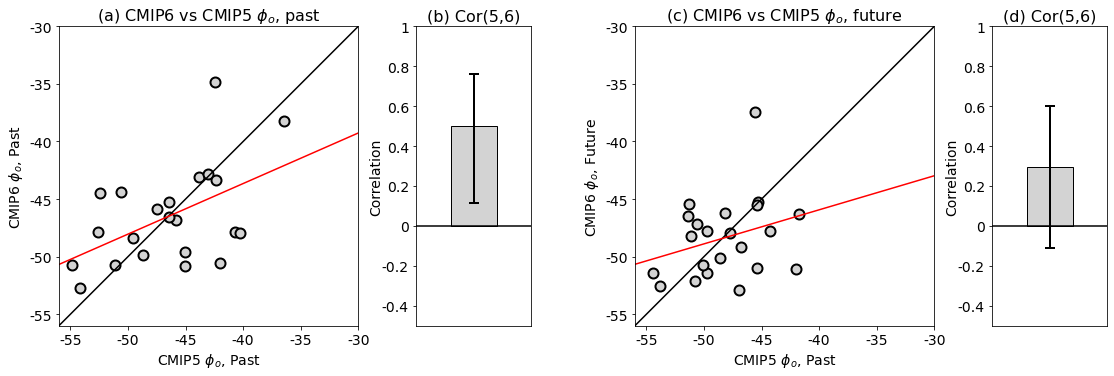

In [3]:
fig = plt.figure(figsize=(16,16))

ax1 = fig.add_axes(np.array([0.05,0.83,0.26,0.26]))

ax1.set_xlim(-56,-30)
ax1.set_ylim(-56,-30)
ax1.set_xticks([-55,-50,-45,-40,-35,-30])
ax1.set_xticklabels(['-55','-50','-45','-40','-35','-30'], fontsize=14)
ax1.set_xlabel('CMIP5 $\phi_{o}$, Past', fontsize=14)
ax1.set_ylabel('CMIP6 $\phi_{o}$, Past', fontsize=14)
ax1.set_title('(a) CMIP6 vs CMIP5 $\phi_{o}$, past', fontsize=16)
ax1.set_yticks([-55,-50,-45,-40,-35,-30])
ax1.set_yticklabels(['-55','-50','-45','-40','-35','-30'], fontsize=14)
ax1.plot(jlatcmip5p, jlatcmip6p,"o",markersize=10, markerfacecolor='lightgray',markeredgecolor='black',markeredgewidth=2)
ax1.plot([-56,-30],[-56,-30],color='black')
a, b = linfit.linfit_xy(jlatcmip5p,jlatcmip6p)
xplot = np.arange(-56,-29,1)
ax1.plot(xplot, a + b*xplot, color='red')


ax2 = fig.add_axes(np.array([0.36,0.83,0.1,0.26]))
corval = np.corrcoef(jlatcmip5p,jlatcmip6p)
corval = corval[0,1]
mincor, maxcor = boot.boot_corr_ci(jlatcmip5p,jlatcmip6p,95)


ax2.bar(1,corval,color='lightgray',edgecolor='black')
ax2.plot([0,2],[0,0], color='black')
ax2.errorbar(1, corval, [[corval-mincor],[maxcor-corval]], color='black', linewidth=2, capsize=5, capthick=2)
ax2.set_xlim(0,2)
ax2.set_ylim(-0.5,1)
ax2.set_xticks([])
ax2.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax2.set_yticklabels(['-0.4','-0.2','0','0.2','0.4','0.6','0.8','1'], fontsize=14)
#ax2.label_params(axis='y',pad=0)
ax2.set_ylabel("Correlation", fontsize=14, labelpad=-1)
ax2.set_title('(b) Cor(5,6)', fontsize=16)


offset=0.5

ax1 = fig.add_axes(np.array([0.05+offset,0.83,0.26,0.26]))

ax1.set_xlim(-56,-30)
ax1.set_ylim(-56,-30)
ax1.set_xticks([-55,-50,-45,-40,-35,-30])
ax1.set_xticklabels(['-55','-50','-45','-40','-35','-30'], fontsize=14)
ax1.set_xlabel('CMIP5 $\phi_{o}$, Past', fontsize=14)
ax1.set_ylabel('CMIP6 $\phi_{o}$, Future', fontsize=14)
ax1.set_title('(c) CMIP6 vs CMIP5 $\phi_{o}$, future', fontsize=16)
ax1.set_yticks([-55,-50,-45,-40,-35,-30])
ax1.set_yticklabels(['-55','-50','-45','-40','-35','-30'], fontsize=14)
ax1.plot(jlatcmip5f, jlatcmip6f,"o",markersize=10, markerfacecolor='lightgray',markeredgecolor='black',markeredgewidth=2)
ax1.plot([-56,-30],[-56,-30],color='black')
a, b = linfit.linfit_xy(jlatcmip5f,jlatcmip6f)
xplot = np.arange(-56,-29,1)
ax1.plot(xplot, a + b*xplot, color='red')


ax2 = fig.add_axes(np.array([0.36+offset,0.83,0.1,0.26]))
corval = np.corrcoef(jlatcmip5f,jlatcmip6f)
corval = corval[0,1]
mincor, maxcor = boot.boot_corr_ci(jlatcmip5f,jlatcmip6f,95)

ax2.bar(1,corval,color='lightgray',edgecolor='black')
ax2.plot([0,2],[0,0], color='black')
ax2.errorbar(1, corval, [[corval-mincor],[maxcor-corval]], color='black', linewidth=2, capsize=5, capthick=2)
ax2.set_xlim(0,2)
ax2.set_ylim(-0.5,1)
ax2.set_xticks([])
ax2.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax2.set_yticklabels(['-0.4','-0.2','0','0.2','0.4','0.6','0.8','1'], fontsize=14)
#ax2.label_params(axis='y',pad=0)
ax2.set_ylabel("Correlation", fontsize=14, labelpad=-1)
ax2.set_title('(d) Cor(5,6)', fontsize=16)

fig.savefig("figs2.pdf", bbox_inches="tight", facecolor="white")
